<a href="https://colab.research.google.com/github/michaelrwijaya/Sentiment-Analysis-ofTikTok-Shop-Closing-/blob/main/Pengolahan_Data_Analisis_Sentimen_Kebijakan_Penutupan_Tiktok_Shop_Menggunakan_Support_Vector_Machine_Dan_Pembobotan_TF_IDF_Berdasarkan_Komentar_Pada_Youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.7 MB/s eta 0:00:00


In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [ ]:
data = pd.read_csv("komenyt.csv")

#PreProcess

In [ ]:
data.isna().sum()

Komen       0
Sentimen    5
dtype: int64

In [ ]:
data['Sentimen'].fillna(value=1, inplace=True)

In [ ]:
data.isna().sum()

Komen       0
Sentimen    0
dtype: int64

In [ ]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
data['komen_len'] = data['Komen'].apply(lambda x: len(x) - x.count(" "))
data['punct'] = data['Komen'].apply(lambda x: count_punct(x))
data.head()

,Komen,Sentimen,komen_len,punct
0,semuanya bisnis online harus di hapus sangat m...,0.0,69,0.0
1,Sangat setuju kali ini kputusan pemerintahðŸ˜Š,0.0,41,0.0
2,"game online mohon di tutup,anakku sampai sakit...",0.0,54,3.7
3,Jujur Asli 1000% gua lebih suka belanja Online...,1.0,136,4.4
4,Tiktok shop di tutup pemerintah dmpak yg telah...,1.0,218,2.3


In [ ]:
data

,Komen,Sentimen,komen_len,punct
0,semuanya bisnis online harus di hapus sangat m...,0.0,69,0.0
1,Sangat setuju kali ini kputusan pemerintahðŸ˜Š,0.0,41,0.0
2,"game online mohon di tutup,anakku sampai sakit...",0.0,54,3.7
3,Jujur Asli 1000% gua lebih suka belanja Online...,1.0,136,4.4
4,Tiktok shop di tutup pemerintah dmpak yg telah...,1.0,218,2.3
...,...,...,...,...
1031,Masih ada td gw cek KERANJANG KUNINGnya,1.0,33,0.0
1032,Jualan online di razia aja seperti jualan kaki...,0.0,127,8.7
1033,Mantap. Selamat kan. Ekonomi. Rakyat,0.0,32,9.4
1034,Seharusnya yang dilarang barang barang dari ci...,1.0,135,1.5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Komen      1036 non-null   object 
 1   Sentimen   1036 non-null   float64
 2   komen_len  1036 non-null   int64  
 3   punct      1036 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 32.5+ KB


In [ ]:
def preprocess_text(kalimat):
    def remove_unicode(text):
        return ''.join(char for char in text if ord(char) < 128)

    if isinstance(kalimat, str):
        # Convert to lowercase
        lower_case = kalimat.lower()

        # Remove non-ASCII characters
        lower_case = remove_unicode(lower_case)

        # Remove digits
        hasil = re.sub(r"\d+", "", lower_case)

        # Replace non-word characters with space
        hasil = re.sub(r'\W', ' ', hasil)

        # Remove punctuation
        hasil = hasil.translate(str.maketrans("", "", string.punctuation))

        # Strip leading and trailing whitespaces
        hasil = hasil.strip()

        return hasil
    else:
        return ""

In [ ]:
data['text_clean'] = data['Komen'].apply(preprocess_text)
data.head()

,Komen,Sentimen,komen_len,punct,text_clean
0,semuanya bisnis online harus di hapus sangat m...,0.0,69,0.0,semuanya bisnis online harus di hapus sangat m...
1,Sangat setuju kali ini kputusan pemerintahðŸ˜Š,0.0,41,0.0,sangat setuju kali ini kputusan pemerintah
2,"game online mohon di tutup,anakku sampai sakit...",0.0,54,3.7,game online mohon di tutup anakku sampai sakit...
3,Jujur Asli 1000% gua lebih suka belanja Online...,1.0,136,4.4,jujur asli gua lebih suka belanja online ket...
4,Tiktok shop di tutup pemerintah dmpak yg telah...,1.0,218,2.3,tiktok shop di tutup pemerintah dmpak yg telah...


## Tokenize

In [ ]:
import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [ ]:
def tokenize_text(kalimat):
  tokens = nltk.tokenize.word_tokenize(kalimat)
  return tokens

In [ ]:
data['token'] = data['text_clean'].apply(tokenize_text)
data

,Komen,Sentimen,komen_len,punct,text_clean,token
0,semuanya bisnis online harus di hapus sangat m...,0.0,69,0.0,semuanya bisnis online harus di hapus sangat m...,"[semuanya, bisnis, online, harus, di, hapus, s..."
1,Sangat setuju kali ini kputusan pemerintahðŸ˜Š,0.0,41,0.0,sangat setuju kali ini kputusan pemerintah,"[sangat, setuju, kali, ini, kputusan, pemerintah]"
2,"game online mohon di tutup,anakku sampai sakit...",0.0,54,3.7,game online mohon di tutup anakku sampai sakit...,"[game, online, mohon, di, tutup, anakku, sampa..."
3,Jujur Asli 1000% gua lebih suka belanja Online...,1.0,136,4.4,jujur asli gua lebih suka belanja online ket...,"[jujur, asli, gua, lebih, suka, belanja, onlin..."
4,Tiktok shop di tutup pemerintah dmpak yg telah...,1.0,218,2.3,tiktok shop di tutup pemerintah dmpak yg telah...,"[tiktok, shop, di, tutup, pemerintah, dmpak, y..."
...,...,...,...,...,...,...
1031,Masih ada td gw cek KERANJANG KUNINGnya,1.0,33,0.0,masih ada td gw cek keranjang kuningnya,"[masih, ada, td, gw, cek, keranjang, kuningnya]"
1032,Jualan online di razia aja seperti jualan kaki...,0.0,127,8.7,jualan online di razia aja seperti jualan kaki...,"[jualan, online, di, razia, aja, seperti, jual..."
1033,Mantap. Selamat kan. Ekonomi. Rakyat,0.0,32,9.4,mantap selamat kan ekonomi rakyat,"[mantap, selamat, kan, ekonomi, rakyat]"
1034,Seharusnya yang dilarang barang barang dari ci...,1.0,135,1.5,seharusnya yang dilarang barang barang dari ci...,"[seharusnya, yang, dilarang, barang, barang, d..."


#Filtering

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [ ]:
from nltk.corpus import stopwords
nltk.download("stopwords")

list_stopwords = stopwords.words('indonesian')

list_stopwords.extend(["yg", "dg", "ny", "itu", "aja", "di", "dan", "juga", "ini", "nya", "gk", "gak", "br", "ga", "ya", "ad", "ae", "ah", "aje", "aj", "ajh", "ajah", "az",
                       "ato", "ber", "bgt", "bkn", "bkn", "brp", "byk", "dar", "deh", "dh", "dl", "dr", "eh", "fb", "gpp", "ka", "jg", "jgn", "jga", "jgan", "jd", "jdi", "ja",
                       "hr", "href", "jt","kyk", "krn", "kya", "kn", "kl", "klo", "kah", "kek", "mlh", "mkn", "ma", "lsg", "loh", "lg", "lgi", "lgsg", "pan", "pa", "org", "offlen",
                       "oe", "ni", "nnti", "mrk", "msh", "msih", "mol", "rb", "po", "pd", "sy", "sya", "sm", "sma", "sih", "si", "sen", "ug", "utk", "tuh", "tu", "ttp", "tp", "tpi", "tc", "tar", "zcsafez", "www", "yo", "yng", "zul"])

list_stopwords = set(list_stopwords)

def stopwords_removal(kalimats):
  return [kalimat for kalimat in kalimats if kalimat not in list_stopwords]

data['yt_token_wsw'] = data['token'].apply(stopwords_removal)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data.head()

,Komen,Sentimen,komen_len,punct,text_clean,token,yt_token_wsw
0,semuanya bisnis online harus di hapus sangat m...,0.0,69,0.0,semuanya bisnis online harus di hapus sangat m...,"[semuanya, bisnis, online, harus, di, hapus, s...","[bisnis, online, hapus, merusak, pedagang]"
1,Sangat setuju kali ini kputusan pemerintahðŸ˜Š,0.0,41,0.0,sangat setuju kali ini kputusan pemerintah,"[sangat, setuju, kali, ini, kputusan, pemerintah]","[setuju, kali, kputusan, pemerintah]"
2,"game online mohon di tutup,anakku sampai sakit...",0.0,54,3.7,game online mohon di tutup anakku sampai sakit...,"[game, online, mohon, di, tutup, anakku, sampa...","[game, online, mohon, tutup, anakku, sakit, ga..."
3,Jujur Asli 1000% gua lebih suka belanja Online...,1.0,136,4.4,jujur asli gua lebih suka belanja online ket...,"[jujur, asli, gua, lebih, suka, belanja, onlin...","[jujur, asli, gua, suka, belanja, online, keti..."
4,Tiktok shop di tutup pemerintah dmpak yg telah...,1.0,218,2.3,tiktok shop di tutup pemerintah dmpak yg telah...,"[tiktok, shop, di, tutup, pemerintah, dmpak, y...","[tiktok, shop, tutup, pemerintah, dmpak, puluh..."


# Stemming & Lematization

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

In [ ]:
def stemming_text(tokens):
    hasil = [stemmer.stem(token) for token in tokens]
    return hasil

In [ ]:
data['stemmed'] = data['yt_token_wsw'].apply(stemming_text)
data.head()

,Komen,Sentimen,komen_len,punct,text_clean,token,yt_token_wsw,stemmed
0,semuanya bisnis online harus di hapus sangat m...,0.0,69,0.0,semuanya bisnis online harus di hapus sangat m...,"[semuanya, bisnis, online, harus, di, hapus, s...","[bisnis, online, hapus, merusak, pedagang]","[bisnis, online, hapus, rusak, dagang]"
1,Sangat setuju kali ini kputusan pemerintahðŸ˜Š,0.0,41,0.0,sangat setuju kali ini kputusan pemerintah,"[sangat, setuju, kali, ini, kputusan, pemerintah]","[setuju, kali, kputusan, pemerintah]","[tuju, kali, kputusan, perintah]"
2,"game online mohon di tutup,anakku sampai sakit...",0.0,54,3.7,game online mohon di tutup anakku sampai sakit...,"[game, online, mohon, di, tutup, anakku, sampa...","[game, online, mohon, tutup, anakku, sakit, ga...","[game, online, mohon, tutup, anak, sakit, gara..."
3,Jujur Asli 1000% gua lebih suka belanja Online...,1.0,136,4.4,jujur asli gua lebih suka belanja online ket...,"[jujur, asli, gua, lebih, suka, belanja, onlin...","[jujur, asli, gua, suka, belanja, online, keti...","[jujur, asli, gua, suka, belanja, online, keti..."
4,Tiktok shop di tutup pemerintah dmpak yg telah...,1.0,218,2.3,tiktok shop di tutup pemerintah dmpak yg telah...,"[tiktok, shop, di, tutup, pemerintah, dmpak, y...","[tiktok, shop, tutup, pemerintah, dmpak, puluh...","[tiktok, shop, tutup, perintah, dmpak, puluh, ..."


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(list_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
data['lemmatized'] = data['stemmed'].apply(lambda x: lemmatize_text(x))
data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Komen,Sentimen,komen_len,punct,text_clean,token,yt_token_wsw,stemmed,lemmatized
0,semuanya bisnis online harus di hapus sangat m...,0.0,69,0.0,semuanya bisnis online harus di hapus sangat m...,"[semuanya, bisnis, online, harus, di, hapus, s...","[bisnis, online, hapus, merusak, pedagang]","[bisnis, online, hapus, rusak, dagang]",bisnis online hapus rusak dagang
1,Sangat setuju kali ini kputusan pemerintahðŸ˜Š,0.0,41,0.0,sangat setuju kali ini kputusan pemerintah,"[sangat, setuju, kali, ini, kputusan, pemerintah]","[setuju, kali, kputusan, pemerintah]","[tuju, kali, kputusan, perintah]",tuju kali kputusan perintah
2,"game online mohon di tutup,anakku sampai sakit...",0.0,54,3.7,game online mohon di tutup anakku sampai sakit...,"[game, online, mohon, di, tutup, anakku, sampa...","[game, online, mohon, tutup, anakku, sakit, ga...","[game, online, mohon, tutup, anak, sakit, gara...",game online mohon tutup anak sakit gara main game
3,Jujur Asli 1000% gua lebih suka belanja Online...,1.0,136,4.4,jujur asli gua lebih suka belanja online ket...,"[jujur, asli, gua, lebih, suka, belanja, onlin...","[jujur, asli, gua, suka, belanja, online, keti...","[jujur, asli, gua, suka, belanja, online, keti...",jujur asli gua suka belanja online ketimbang d...
4,Tiktok shop di tutup pemerintah dmpak yg telah...,1.0,218,2.3,tiktok shop di tutup pemerintah dmpak yg telah...,"[tiktok, shop, di, tutup, pemerintah, dmpak, y...","[tiktok, shop, tutup, pemerintah, dmpak, puluh...","[tiktok, shop, tutup, perintah, dmpak, puluh, ...",tiktok shop tutup perintah dmpak puluh ribu ka...


#Viz

In [ ]:
from nltk.probability import FreqDist

In [ ]:
import matplotlib as plt

In [ ]:
all_tokens = [token for sublist in data['stemmed'] for token in  sublist ]
freq_dist = FreqDist(all_tokens)
print(freq_dist.most_common())

[('jual', 322), ('tiktok', 269), ('online', 255), ('dagang', 193), ('perintah', 171), ('tutup', 161), ('pasar', 161), ('harga', 141), ('barang', 132), ('shop', 116), ('beli', 106), ('larang', 106), ('umkm', 103), ('artis', 93), ('offline', 87), ('tuju', 86), ('toko', 86), ('tik', 80), ('indonesia', 78), ('tok', 75), ('kalo', 74), ('produk', 73), ('orang', 71), ('tanah', 70), ('murah', 70), ('quot', 64), ('abang', 63), ('kaya', 57), ('pajak', 56), ('sepi', 53), ('atur', 52), ('ekonomi', 51), ('rakyat', 48), ('mati', 48), ('mahal', 46), ('udah', 46), ('biar', 45), ('negara', 44), ('lokal', 43), ('bikin', 43), ('aplikasi', 43), ('hapus', 40), ('lazada', 40), ('belanja', 38), ('shopee', 36), ('cari', 36), ('usaha', 36), ('jaman', 36), ('laku', 35), ('bagus', 34), ('hidup', 34), ('bayar', 34), ('bantu', 33), ('sewa', 33), ('rugi', 32), ('kasi', 32), ('masyarakat', 31), ('dll', 31), ('saing', 31), ('langsung', 30), ('karna', 30), ('kerja', 29), ('a', 29), ('china', 29), ('media', 28), ('live

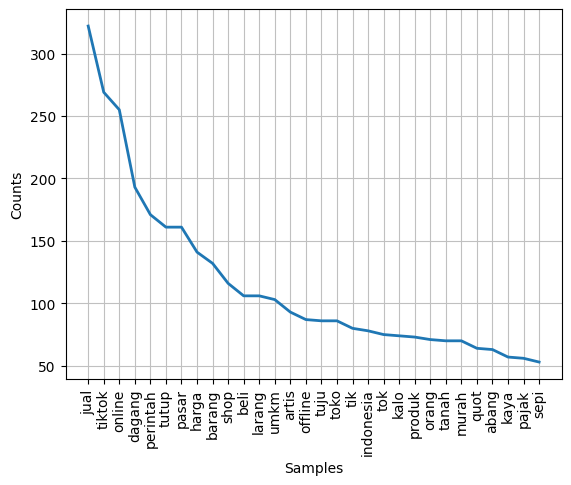

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
freq_dist.plot(30, cumulative = False)

In [ ]:
data['Sentimen'].value_counts()

0.0    560
1.0    476
Name: Sentimen, dtype: int64

#Word Cloud


In [ ]:
from wordcloud import WordCloud

In [ ]:
data_negative = data[ (data['Sentimen']==1)]
data_positive = data[(data['Sentimen']==0)]
#convert to list
negative_list=data_negative['lemmatized'].tolist()
positive_list= data_positive['lemmatized'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of spam
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of ham
filtered_positive = filtered_positive.lower()

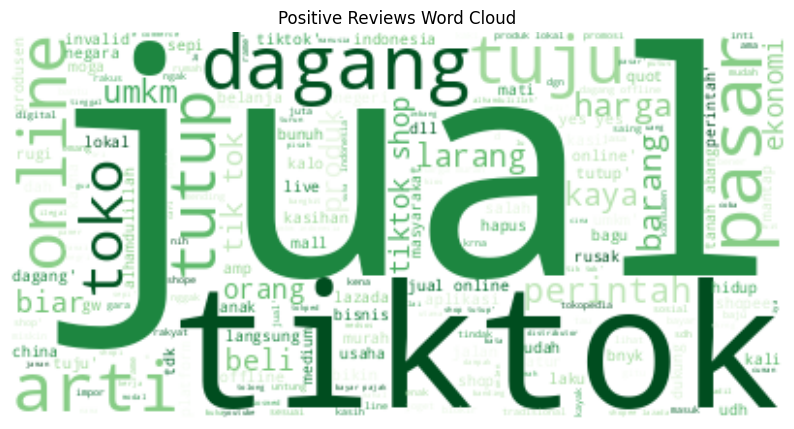

In [ ]:
import matplotlib.pyplot as plt
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews Word Cloud")
plt.show()

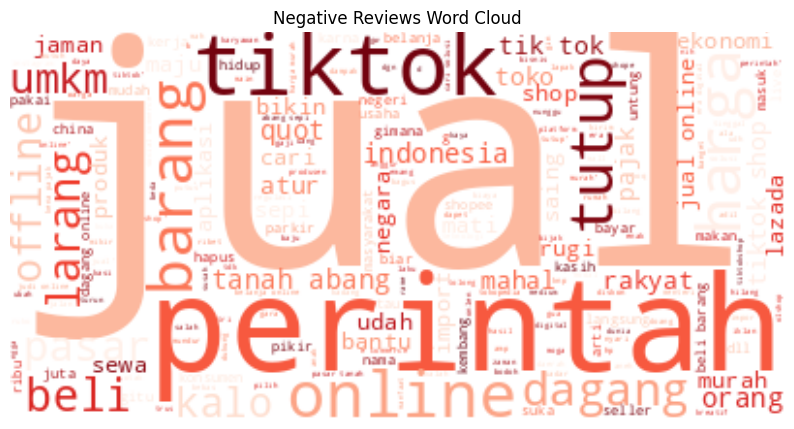

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

# Feature Extraction

In [ ]:
X = data['lemmatized']
y = data['Sentimen']
print(X.shape)
print(y.shape)

(1036,)
(1036,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(725,)
(311,)
(725,)
(311,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assuming X_train and X_test are your text data
tfidf = TfidfVectorizer(max_df=0.5, min_df=2)
X_train_vect = tfidf.fit_transform(X_train)
X_test_vect = tfidf.transform(X_test)

# Convert sparse matrix to DataFrame
X_train_vect_df = pd.DataFrame(X_train_vect.toarray(), columns=tfidf.get_feature_names_out())
X_test_vect_df = pd.DataFrame(X_test_vect.toarray(), columns=tfidf.get_feature_names_out())

# Print the first few rows of the transformed training data
print(X_train_vect_df.head())

   aamiin     abang  abg  abis  about  adab  adaptasi  adil  affiliate  air  \
0     0.0  0.000000  0.0   0.0    0.0   0.0       0.0   0.0        0.0  0.0   
1     0.0  0.000000  0.0   0.0    0.0   0.0       0.0   0.0        0.0  0.0   
2     0.0  0.371215  0.0   0.0    0.0   0.0       0.0   0.0        0.0  0.0   
3     0.0  0.000000  0.0   0.0    0.0   0.0       0.0   0.0        0.0  0.0   
4     0.0  0.000000  0.0   0.0    0.0   0.0       0.0   0.0        0.0  0.0   

   ...  wajar  wajib     warga  wkwkwk  woi  yaa       yah  yes  youtube  \
0  ...    0.0    0.0  0.000000     0.0  0.0  0.0  0.000000  0.0      0.0   
1  ...    0.0    0.0  0.000000     0.0  0.0  0.0  0.244981  0.0      0.0   
2  ...    0.0    0.0  0.249869     0.0  0.0  0.0  0.000000  0.0      0.0   
3  ...    0.0    0.0  0.000000     0.0  0.0  0.0  0.000000  0.0      0.0   
4  ...    0.0    0.0  0.000000     0.0  0.0  0.0  0.000000  0.0      0.0   

   zaman  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0  

[

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

              precision    recall  f1-score   support

         0.0     0.7551    0.6687    0.7093       166
         1.0     0.6646    0.7517    0.7055       145

    accuracy                         0.7074       311
   macro avg     0.7099    0.7102    0.7074       311
weighted avg     0.7129    0.7074    0.7075       311



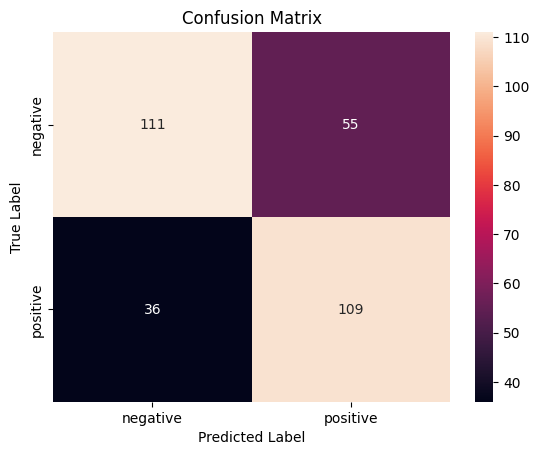

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

classifier = SVC(kernel='linear', random_state=0,class_weight='balanced')
classifier.fit(X_train_vect, y_train)
svm_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, svm_pred, digits=4))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#With Out TF-IDF

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Create a CountVectorizer instance
count_vectorizer = CountVectorizer(max_features=3000)  # You can adjust the number of features

# Fit and transform the training data
X_train_bow = count_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_bow = count_vectorizer.transform(X_test)

# Convert sparse matrix to DataFrame
X_train_bow = pd.DataFrame(X_train_bow.toarray(), columns=count_vectorizer.get_feature_names_out())
X_test_bow = pd.DataFrame(X_test_bow.toarray(), columns=count_vectorizer.get_feature_names_out())

# Print the first few rows of the resulting DataFrames
print("X_train_bow_df:")
print(X_train_bow.head())

print("\nX_test_bow_df:")
print(X_test_bow.head())





X_train_bow_df:
   aamiin  abang  abg  abis  abisxan  abng  about  adab  adaptasi  adek  ...  \
0       0      0    0     0        0     0      0     0         0     0  ...   
1       0      0    0     0        0     0      0     0         0     0  ...   
2       0      2    0     0        0     0      0     0         0     0  ...   
3       0      0    0     0        0     0      0     0         0     0  ...   
4       0      0    0     0        0     0      0     0         0     0  ...   

   you  youtube  youtubers  yuan  yuk  yutub  zaman  zina  zulkifli  zulkipli  
0    0        0          0     0    0      0      0     0         0         0  
1    0        0          0     0    0      0      0     0         0         0  
2    0        0          0     0    0      0      0     0         0         0  
3    0        0          0     0    0      0      0     0         0         0  
4    0        0          0     0    0      0      0     0         0         0  

[5 rows x 2032 columns

              precision    recall  f1-score   support

         0.0     0.6667    0.7590    0.7099       166
         1.0     0.6721    0.5655    0.6142       145

    accuracy                         0.6688       311
   macro avg     0.6694    0.6623    0.6620       311
weighted avg     0.6692    0.6688    0.6653       311



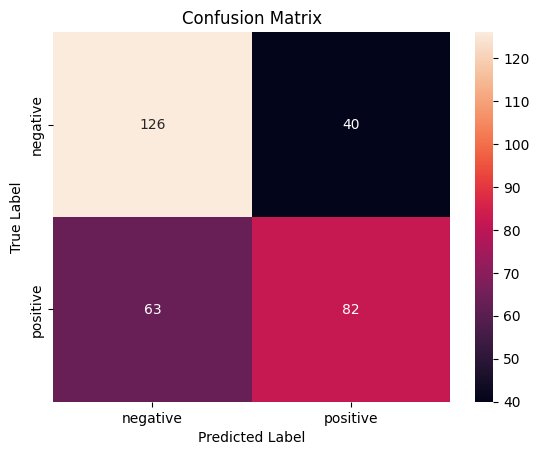

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


classifier = SVC(kernel='linear', random_state=0,class_weight='balanced')
classifier.fit(X_train_bow, y_train)
svm_pred = classifier.predict(X_test_bow)

# Classification report
print(classification_report(y_test, svm_pred, digits=4))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#K Cross Fold Validation


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assuming X_train and X_test are your text data
tfidf = TfidfVectorizer(max_df=0.5, min_df=2)
X_vect = tfidf.fit_transform(X)
X_vec = pd.DataFrame(X_vect.toarray(), columns=tfidf.get_feature_names_out())
X_vec.T

,0,1,2,3,4,5,6,7,8,9,...,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035
aamiin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
abang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.436906,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
abg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
abis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
abng,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yaa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
yah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.900312,0.0,0.0,0.0,0.0,0.0
youtube,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC  # Import Support Vector Machine classifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import strip_accents_ascii
import pandas as pd

svm_classifier = SVC(kernel='linear')

cv_scores = cross_val_score(svm_classifier, X_vec, y, cv=10)

print("Cross-validation scores:", cv_scores)

print(f"Mean CV score: {cv_scores.mean():.4f}")
print(f"Standard deviation of CV scores: {cv_scores.std():.4f}")

Cross-validation scores: [0.73076923 0.74038462 0.74038462 0.71153846 0.70192308 0.67307692
 0.70873786 0.75728155 0.69902913 0.67961165]
Mean CV score: 0.7143
Standard deviation of CV scores: 0.0261
